In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.utils import resample

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/thyroid_data.csv')

In [ ]:
data

,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,0,41,F,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,1,23,F,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,negative
2,2,46,M,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,negative
3,3,70,F,t,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,negative
4,4,70,F,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,2774,82,M,f,f,f,f,f,f,f,...,2.2,t,1,t,68,t,0.77,t,88,sick
3217,2776,79,M,f,f,f,f,f,f,f,...,1.1,t,0.7,t,116,t,0.85,t,137,sick
3218,2782,50,F,f,f,f,f,f,f,f,...,4.8,t,0.6,t,98,t,0.8,t,122,sick
3219,2786,73,?,f,f,f,f,f,f,f,...,0.015,t,1.8,t,173,t,1,t,173,sick


In [ ]:
data.shape

(3221, 28)

In [ ]:
n = len(data[data['Category'] == 'hyperthyroid'])
print("No of hyperthyroid in Dataset:",n)

n1 = len(data[data['Category'] == 'hypothyroid'])
print("No of hypothyroid in Dataset:",n1)

n2 = len(data[data['Category'] == 'sick'])
print("No of sick in Dataset:",n2)

n3 = len(data[data['Category'] == 'negative'])
print("No of negative in Dataset:",n3)

No of hyperthyroid in Dataset: 77
No of hypothyroid in Dataset: 220
No of sick in Dataset: 171
No of negative in Dataset: 2753


In [ ]:
data.columns

Index(['S.no', 'Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH',
       'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U',
       'FTI Measured', 'FTI', 'Category'],
      dtype='object')

**Checking the missing value**s

In [ ]:
data.isnull().sum()

S.no                         0
Age                          0
Sex                          0
On Thyroxine                 0
Query on Thyroxine           0
On Antithyroid Medication    0
Sick                         0
Pregnant                     0
Thyroid Surgery              0
I131 Treatment               0
Query Hypothyroid            0
Query Hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH Measured                 0
TSH                          0
T3 Measured                  0
T3                           0
TT4 Measured                 0
TT4                          0
T4U Measured                 0
T4U                          0
FTI Measured                 0
FTI                          0
Category                     0
dtype: int64

   **We can see that there are no missing values. But we can see the invalid values like '?'. Let's replace such values with 'nan' and check for the missing values again.**

In [ ]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count != 0:
        print(column,data[column][data[column]=='?'].count())

Age 1
Sex 127
TSH 247
T3 589
TT4 142
T4U 276
FTI 274


**Let's drop some unnecessary columns**

In [ ]:
data=data.drop([ 'S.no','On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
        'TSH Measured','Hypopituitary','Psych',
       'T3 Measured',  'TT4 Measured', 'T4U Measured',
       'FTI Measured'],axis=1)

**Now replace the '?' values with numpy nan**

In [ ]:
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)

In [ ]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count == 0:
        print(column,data[column][data[column]=='?'].count())

Age 0
Sex 0
Sick 0
Pregnant 0
Thyroid Surgery 0
Goitre 0
Tumor 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
Category 0


**So, we have replaced all such values with 'nan' values.**

In [ ]:
for column in data.columns:
    print(column,(data[column].unique()))

Age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
Sex ['F' 'M' nan]
Sick ['f' 't']
Pregnant ['f' 't']
Thyroid Surgery ['f' 't']
Goitre ['f' 't']
Tumor ['f' 't']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5' '1.7' '7.3' '1.8' '0.26' '45' '5.4' '0.99' '0.25'
 '0.92' '0.15' '0.64' '1' '0.4' '2' '2.6' '14.8' '15' '19' '0.02' '3'
 '2.9' '3.2' '9' '1.6' '4.3' '0.005' '0.31' '0.61' '0.05' '7.8' '160'
 '0.025' '1.4' '0.01' '8.8' '151' '0.04' '3.9' '9

In [ ]:
data.dtypes

Age                object
Sex                object
Sick               object
Pregnant           object
Thyroid Surgery    object
Goitre             object
Tumor              object
TSH                object
T3                 object
TT4                object
T4U                object
FTI                object
Category           object
dtype: object

**Handling Missing Values**

In [ ]:
data['Age'].fillna((data['Age'].median()), inplace = True)
data['TSH'].fillna((data['TSH'].median()), inplace = True)
data['T3'].fillna((data['T3'].median()), inplace = True)
data['TT4'].fillna((data['TT4'].median()), inplace = True)
data['T4U'].fillna((data['T4U'].median()), inplace = True)
data['FTI'].fillna((data['FTI'].median()), inplace = True)

**Handling nominal categorical variables**

In [ ]:
sex = data[["Sex"]]
sex = pd.get_dummies(sex, drop_first= True)

In [ ]:
sick = data[["Sick"]]
sick = pd.get_dummies(sick, drop_first= True)

In [ ]:
pregnant = data[["Pregnant"]]
pregnant = pd.get_dummies(pregnant, drop_first= True)

In [ ]:
thyroid_surgery = data[["Thyroid Surgery"]]
thyroid_surgery = pd.get_dummies(thyroid_surgery, drop_first= True)

In [ ]:
goitre = data[["Goitre"]]
goitre = pd.get_dummies(goitre, drop_first= True)

In [ ]:
tumor = data[["Tumor"]]
tumor = pd.get_dummies(tumor, drop_first= True)

In [ ]:
data.columns

Index(['Age', 'Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category'],
      dtype='object')

In [ ]:
final_df = pd.concat([data,sex, sick, pregnant, thyroid_surgery,
       goitre, tumor,], axis = 1)

In [ ]:
final_df.columns

Index(['Age', 'Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category', 'Sex_M', 'Sick_t',
       'Pregnant_t', 'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t'],
      dtype='object')

In [ ]:
final_df.drop(['Sex', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'Goitre', 'Tumor'], axis = 1, inplace = True)

**Checking the missing values**

In [ ]:
final_df.isnull().sum()

Age                  0
TSH                  0
T3                   0
TT4                  0
T4U                  0
FTI                  0
Category             0
Sex_M                0
Sick_t               0
Pregnant_t           0
Thyroid Surgery_t    0
Goitre_t             0
Tumor_t              0
dtype: int64

**check the distribution for our continuous data in the dataset.**

<ipython-input-26-058d7c168f6d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[column])
<ipython-input-26-058d7c168f6d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[column])
<ipython-input-26-058d7c168f6d>:8: UserWarning: 

`distplot` is a deprecated function and will be 

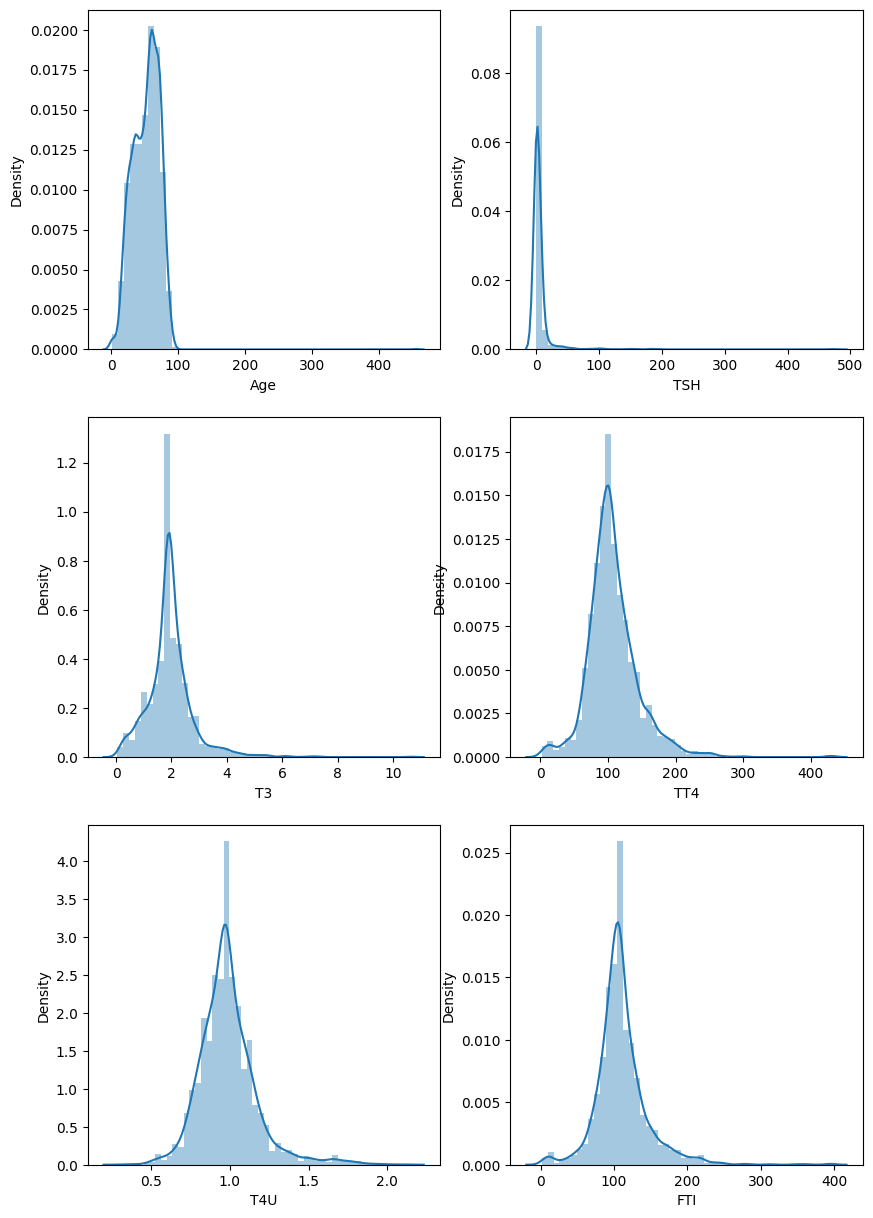

In [ ]:
columns = ['Age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(final_df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

<Axes: xlabel='Category', ylabel='Count'>

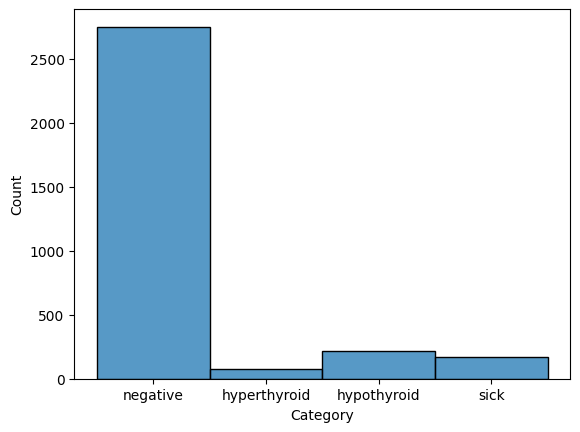

In [ ]:
sns.histplot(final_df['Category'])

**We can see that the dataset is highly imbalanced.**

In [ ]:
final_df = final_df.drop(['TSH'], axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
final_df['Category']=lblEn.fit_transform(final_df['Category'])

<Axes: ylabel='count'>

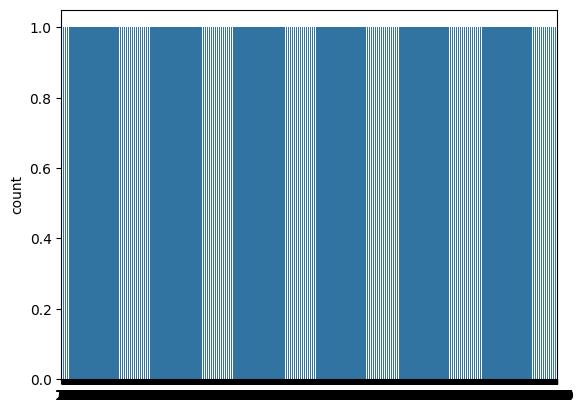

In [ ]:
sns.countplot(final_df['Category'])

In [ ]:
X=final_df.drop(['Category'],axis=1)
y=final_df.Category

**Our dataset is balanced now.**

<Axes: xlabel='Category', ylabel='Count'>

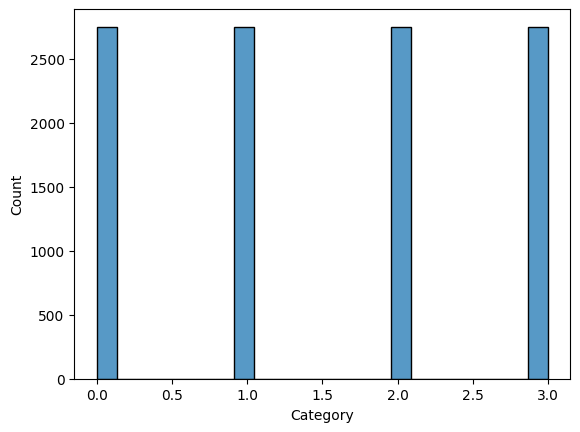

In [ ]:
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE


rdsmple=RandomOverSampler()
X_sampled,y_sampled=rdsmple.fit_resample(X,y)

X_sampled.shape


X_sampled=pd.DataFrame(data=X_sampled,columns=X.columns)


X_sampled


sns.histplot(y_sampled)

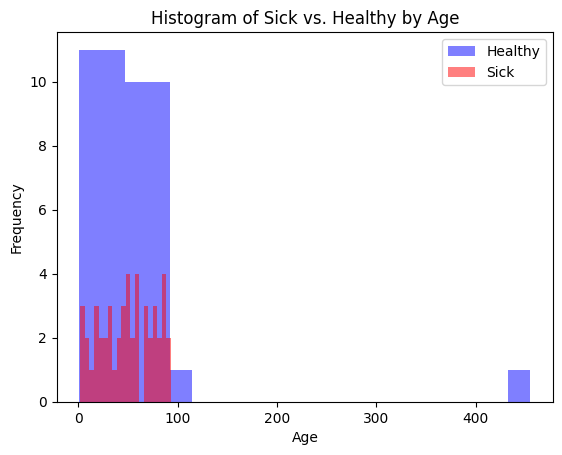

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = {
    'Age': ['41', '23', '46', '70', '18', '59', '80', '66', '68', '84', '67', '71', '28', '65', '42', '63', '51', '81', '54', '55', '60', '25', '73', '34', '78', '37', '85', '26', '58', '64', '44', '48', '61', '35', '83', '21', '87', '53', '77', '27', '69', '74', '38', '76', '45', '36', '22', '43', '72', '82', '31', '39', '49', '62', '57', '1', '50', '30', '29', '75', '19', '7', '79', '17', '24', '15', '32', '47', '16', '52', '33', '13', '10', '89', '56', '20', '90', '40', '88', '14', '86', '94', '12', '4', '11', '8', '5', '455', '2', '91', '6', np.nan, '93'],
    'Sick': ['0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0']
}


# Create a DataFrame
df = pd.DataFrame(data)

# Convert 'Sick' column to 1 for healthy and 0 for sick
df['Sick'] = df['Sick'].map({'1': 0, '0': 1})

# Convert 'Age' column to numeric and handle missing values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with missing values in 'Age'
df = df.dropna(subset=['Age'])

# Plot the histogram
plt.hist(df[df['Sick'] == 0]['Age'], bins=20, alpha=0.5, color='blue', label='Healthy')
plt.hist(df[df['Sick'] == 1]['Age'], bins=20, alpha=0.5, color='red', label='Sick')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Sick vs. Healthy by Age')
plt.legend()
plt.show()


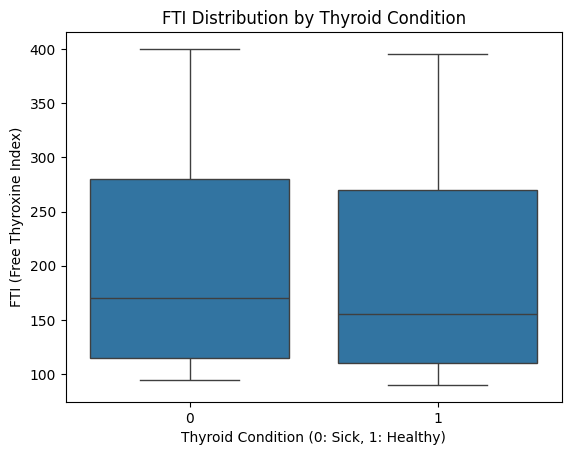

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data
data = {
    'FTI': ['130', '115', '110', '120', '115', '100', '90', '100', '110', '105', '95', '100', '90', '95', '100', '110', '105', '115', '120', '125', '130', '125', '110', '100', '105', '120', '130', '115', '110', '105', '100', '95', '90', '100', '105', '110', '115', '120', '125', '130', '135', '140', '145', '150', '155', '160', '165', '170', '175', '180', '185', '190', '195', '200', '205', '210', '215', '220', '225', '230', '235', '240', '245', '250', '255', '260', '265', '270', '275', '280', '285', '290', '295', '300', '305', '310', '315', '320', '325', '330', '335', '340', '345', '350', '355', '360', '365', '370', '385', '390', '395', '400'],
    'Sick': ['0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1']
}
df = pd.DataFrame(data)

# Convert 'Sick' column to 1 for healthy and 0 for sick
df['Sick'] = df['Sick'].map({'1': 0, '0': 1})

# Convert 'FTI' column to numeric
df['FTI'] = pd.to_numeric(df['FTI'])

# Filter the data for FTI values in the range of 10 to 400
df_filtered = df[(df['FTI'] >= 10) & (df['FTI'] <= 400)]

# Plot the graph
sns.boxplot(x='Sick', y='FTI', data=df_filtered)
plt.xlabel('Thyroid Condition (0: Sick, 1: Healthy)')
plt.ylabel('FTI (Free Thyroxine Index)')
plt.title('FTI Distribution by Thyroid Condition')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sampled,y_sampled,test_size=0.2,random_state=0)

**Fitting data in various models**

In [ ]:
def svm_classifier(X_train,X_test,y_train,y_test):
    classifier_svm=SVC(kernel='rbf',random_state=0)
    classifier_svm.fit(X_train,y_train)
    y_pred=classifier_svm.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Test Score:{classifier_svm.score(X_test,y_test)}')

In [ ]:
def knn_classifier(X_train,X_test,y_train,y_test):
    classifier_knn=KNeighborsClassifier(metric='minkowski',p=2)
    classifier_knn.fit(X_train,y_train)
    y_pred=classifier_knn.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Test Score:{classifier_knn.score(X_test,y_test)}')

In [ ]:
def forest_classifier(X_train,X_test,y_train,y_test):
    classifier_forest=RandomForestClassifier(criterion='entropy',random_state=0)
    classifier_forest.fit(X_train,y_train)
    y_pred=classifier_forest.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Test Score:{classifier_forest.score(X_test,y_test)}')

In [ ]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    result1=svm_classifier(X_train, X_test, y_train, y_test)
    print(result1)
    print("-"*100)
    print()

    print("KNN:\n")
    result2=knn_classifier(X_train, X_test, y_train, y_test)
    print(result2)
    print("-"*100)
    print()

    print("Random Forest:\n")
    result5=forest_classifier(X_train, X_test, y_train, y_test)
    print(result5)

In [ ]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Test Score:0.6268724466636405
----------------------------------------------------------------------------------------------------

KNN:

Test Score:0.8520199727644122
----------------------------------------------------------------------------------------------------

Random Forest:

Test Score:0.9010440308669996


In [ ]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train,y_train)
y_pred = classifier_forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[558,   0,   0,   5],
       [  0, 525,   0,  28],
       [ 21,  48, 422,  41],
       [ 41,  34,   0, 480]])

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       563
           1       0.86      0.95      0.91       553
           2       1.00      0.79      0.88       532
           3       0.87      0.86      0.87       555

    accuracy                           0.90      2203
   macro avg       0.91      0.90      0.90      2203
weighted avg       0.91      0.90      0.90      2203



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier_forest, X=X_train,y=y_train,cv=10)
print(accuracies.mean())

0.9020317820658343


In [ ]:
import pickle
filename = 'thyroid_model.pkl'
pickle.dump(classifier_forest,open(filename,'wb'))

In [ ]:
model = open('thyroid_model.pkl','rb')
forest = pickle.load(model)

In [ ]:
y_pred = forest.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)


array([[558,   0,   0,   5],
       [  0, 525,   0,  28],
       [ 21,  48, 422,  41],
       [ 41,  34,   0, 480]])

In [ ]:
X.columns

Index(['Age', 'T3', 'TT4', 'T4U', 'FTI', 'Sex_M', 'Sick_t', 'Pregnant_t',
       'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t'],
      dtype='object')

In [ ]:
def testing(value):
  if value==0:
    print("Negative")
  elif value==1:
    print("Hyperthyroid")
  elif value==2:
    print("Hypothyroid")
  else:
    print("Sick")

In [ ]:
var=forest.predict([[41,2.5,125,1.14,109,0,0,0,0,0,0]])
testing(var)

Hypothyroid


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
var=forest.predict([[63,5.5,199,1.05,190,0,0,0,0,0,0]])
testing(var)

Negative


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
var=forest.predict([[94,1.4,39,1.16,33,1,0,0,0,0,0]])
testing(var)

Hyperthyroid


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
var=forest.predict([[44,1.4,39,1.16,33,1,0,0,0,0,0]])
testing(var)

Hyperthyroid


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
var=forest.predict([[61,1,96,0.93,109,1,1,0,0,0,0]])
testing(var)

Sick


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
